# Statsmodels dan lasso regression buat ngecek regresi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',False)
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

Sementara pake ver3 ye soalnya filenya belom dirapihin

Original data

In [2]:
df = pd.read_csv('data_clean.csv')
df = df[df['tipe']=='Rumah']
df = df.drop(['Unnamed: 0','tipe'], axis = 1)
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12765 entries, 0 to 13495
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_mandi    12765 non-null  int64  
 1   kamar_tidur    12765 non-null  int64  
 2   luas_bangunan  12765 non-null  float64
 3   luas_tanah     12765 non-null  float64
 4   harga          12765 non-null  float64
 5   deskripsi      12765 non-null  object 
 6   kecamatan      12765 non-null  object 
 7   garasi         12765 non-null  bool   
 8   kolam_renang   12765 non-null  bool   
 9   taman          12765 non-null  bool   
 10  gym            12765 non-null  bool   
 11  listrik        12765 non-null  float64
 12  jumlah_lantai  12765 non-null  int64  
dtypes: bool(4), float64(4), int64(3), object(2)
memory usage: 1.0+ MB


Margin Of Error (jumlah rumah ~ jumlah rumah tangga, sumber: bps)

In [3]:
from math import sqrt

In [4]:
N = 2659205 #population size
n = len(df) #sample size
error = sqrt((N-n)/(N*n))
error*100

0.8829674769368011

In [5]:
num = [i for i in df.columns if df[i].dtypes in ['int64', 'float']]
cat = [i for i in df.columns if df[i].dtypes in ['O', 'bool']]

In [6]:
df[cat] = df[cat].astype('O')

Encoding samain, gausah pake decision tree encoder

In [7]:
from feature_engine.encoding import OrdinalEncoder as OE

x = independent variables

In [8]:
oe = OE(variables = [i for i in cat])
oe.fit(df,df['harga'])
x = oe.transform(df)

In [9]:
from sklearn.preprocessing import StandardScaler as ss

In [10]:
x_scale = ss()
x_scale.fit(x.drop('harga',axis = 1))
y_scale = ss()
y_scale.fit(x[['harga']])

StandardScaler()

Statsmodels buat ngecek awal aja, cara seleksi feature salah satunya bisa pake statsmodels

In [11]:
import statsmodels.api as sm

In [12]:
x = x_scale.transform(x.drop(['harga'],axis = 1))
x = pd.DataFrame(x)
x.columns = df.drop('harga', axis = 1).columns

y = y_scale.transform(df[['harga']])
y = pd.DataFrame(y)
y.columns = ['harga']
initial_data = pd.concat([x,y],axis = 1)
x = sm.add_constant(x)

In [13]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  harga   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     1392.
Date:                Tue, 25 May 2021   Prob (F-statistic):               0.00
Time:                        13:57:50   Log-Likelihood:                -12768.
No. Observations:               12765   AIC:                         2.556e+04
Df Residuals:                   12752   BIC:                         2.566e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -7.581e-17      0.006   -1.3e-14      1.000      -0.011       0.011
kamar_mandi      -0.0123      0.009     -1.325      0.185      -0.031       0.006
kamar_tidur      -0.0242      0.008     -2.869      0.004      -0.041      -0.008
luas_bangunan     0.4263      0.010     43.253      0.000       0.407       0.446
luas_tanah        0.2777      0.009     31.114      0.000       0.260       0.295
deskripsi         0.0346      0.010      3.597      0.000       0.016       0.054
kecamatan         0.1598      0.007     21.757      0.000       0.145       0.174
garasi           -0.0074      0.006     -1.226      0.220      -0.019       0.004
kolam_renang      0.0209      0.006      3.272      0.001       0.008       0.033
taman             0.0027      0.006      0.460      0.645      -0.009       0.014
gym               0.0181      0.006      3.053      0.002       0.006       0.030
listrik           0.0368      0.006      6.058      0.000       0.025       0.049
jumlah_lantai    -0.0378      0.006     -6.061      0.000      -0.050      -0.026
==============================================================================
Omnibus:                    14601.254   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10697949.038
Skew:                           5.213   Prob(JB):                         0.00
Kurtosis:                     144.439   Cond. No.                         4.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
pd.DataFrame(model.params).reset_index().sort_values(by = 0, ascending = False)

,index,0
3,luas_bangunan,4.263251e-01
4,luas_tanah,2.777307e-01
6,kecamatan,1.598397e-01
11,listrik,3.679886e-02
5,deskripsi,3.464602e-02
8,kolam_renang,2.086660e-02
10,gym,1.811446e-02
9,taman,2.727342e-03
0,const,-7.580772e-17
7,garasi,-7.441699e-03


In [15]:
from sklearn.metrics import mean_squared_error as mse

RMSE value

In [16]:
y_pred = model.predict(x)
sqrt(mse(y_pred, y))

0.6579208854800124

In [17]:
from scipy import stats

Cari pval>0.05(not statistically signifigance)

In [18]:
for k in cat+num:
    if df[k].nunique() <100:
        print("="*45,f' {k} ',"="*45)
        var = [i for i in df[k].unique()]
        pair = {}
        udah = []
        for i in var:
            for j in var:
                if (j not in udah) & (i != j):
                    ttest = stats.ttest_ind(a = df[df[k] == i]['harga'],
                                            b = df[df[k] == j]['harga'])
                    p_value = ttest.pvalue
                    pair[f'{i} - {j}'] = p_value
            udah.append(i)
        count = 0
        for i,j in pair.items():
            if j >= 0.05:
                print(i)
                count += 1
        print(f'{k}: {count/len(pair)*100}')
        print("="*100,end = '\n')

=============================================  kecamatan  =============================================
Mampang Prapatan - Tanah Abang
Cilandak - Tebet
Cilandak - Pasar Minggu
Cilandak - Pancoran
Cilandak - Gambir
Kebayoran Baru - Kebayoran Lama
Kebayoran Baru - Setiabudi
Jagakarsa - Koja
Jagakarsa - Cakung
Jagakarsa - Kramat Jati
Jagakarsa - Makasar
Jagakarsa - Matraman
Jagakarsa - Johar Baru
Jagakarsa - Kalideres
Tebet - Pasar Minggu
Tebet - Jatinegara
Tebet - Gambir
Tebet - Senen
Tebet - Palmerah
Pasar Minggu - Pancoran
Pasar Minggu - Jatinegara
Pasar Minggu - Gambir
Pasar Minggu - Palmerah
Kebayoran Lama - Setiabudi
Pesanggrahan - Tanjung Priok
Pesanggrahan - Kelapa Gading
Pesanggrahan - Pademangan
Pesanggrahan - Pulo Gadung
Pesanggrahan - Matraman
Pesanggrahan - Jatinegara
Pesanggrahan - Kemayoran
Pesanggrahan - Cempaka Putih
Pesanggrahan - Sawah Besar
Pesanggrahan - Johar Baru
Pesanggrahan - Senen
Pesanggrahan - Palmerah
Pesanggrahan - Kembangan
Pesanggrahan - Kebon Jeruk
Pesangg

EDA original data

kamar_mandi


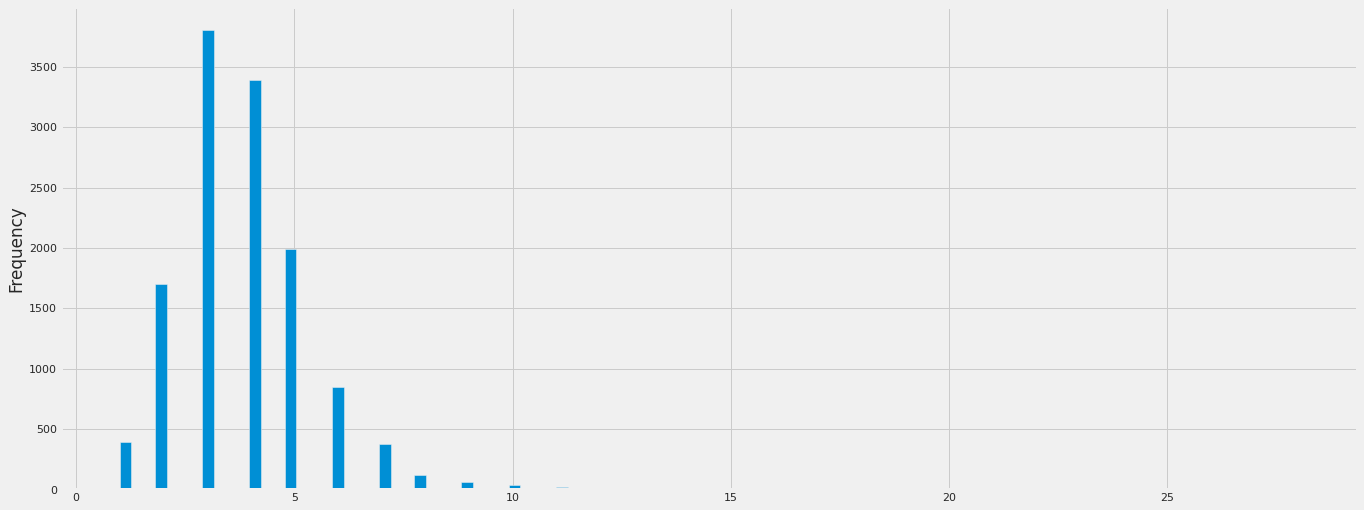

kamar_tidur


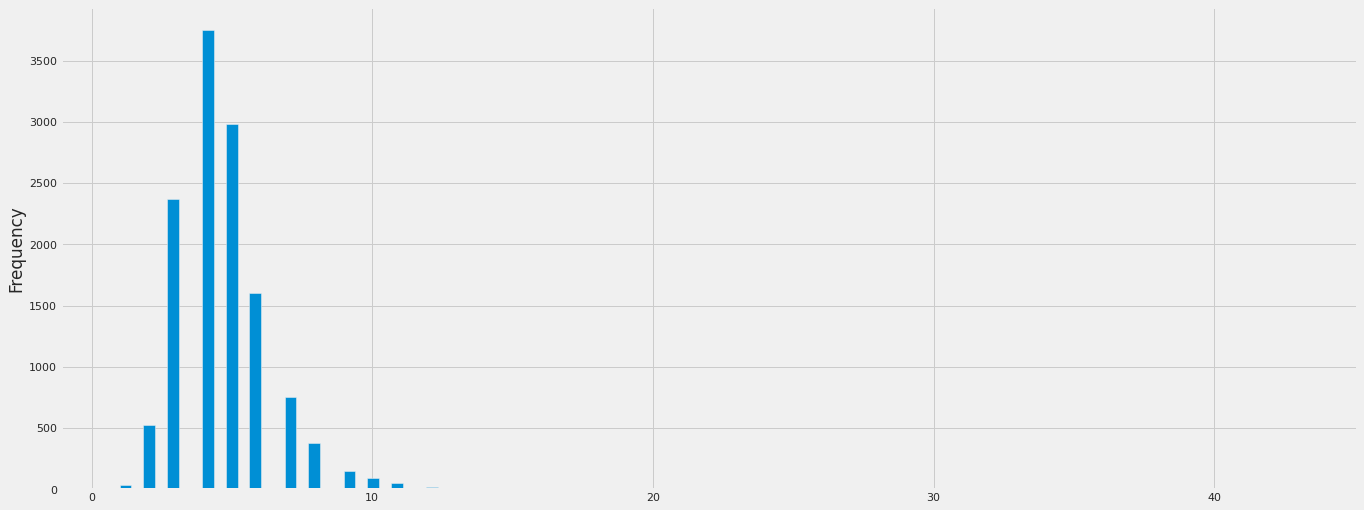

luas_bangunan


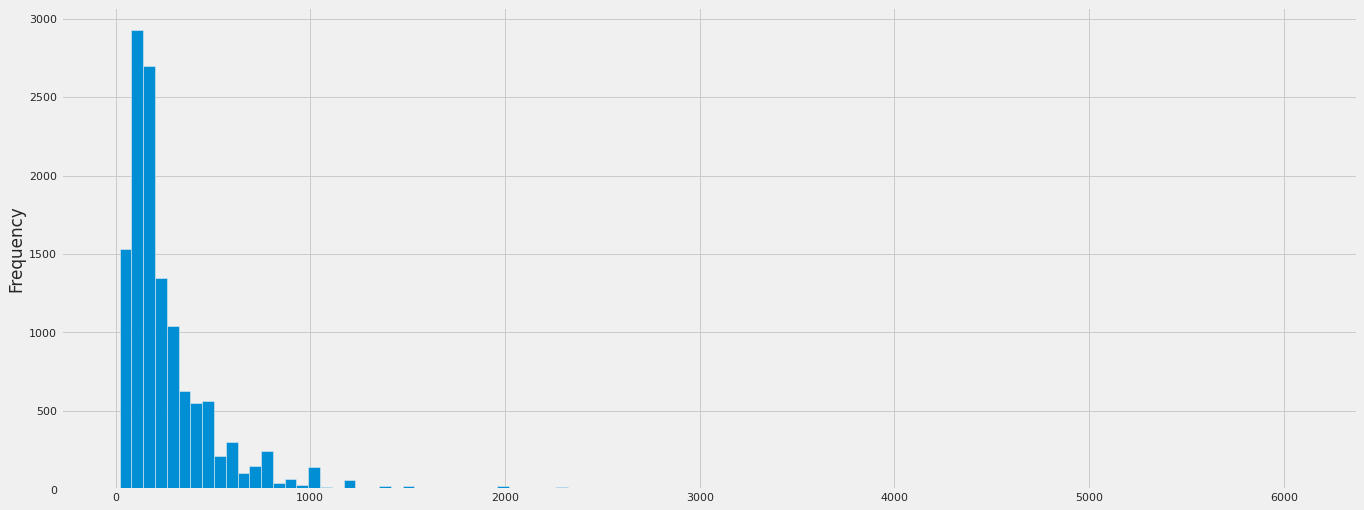

luas_tanah


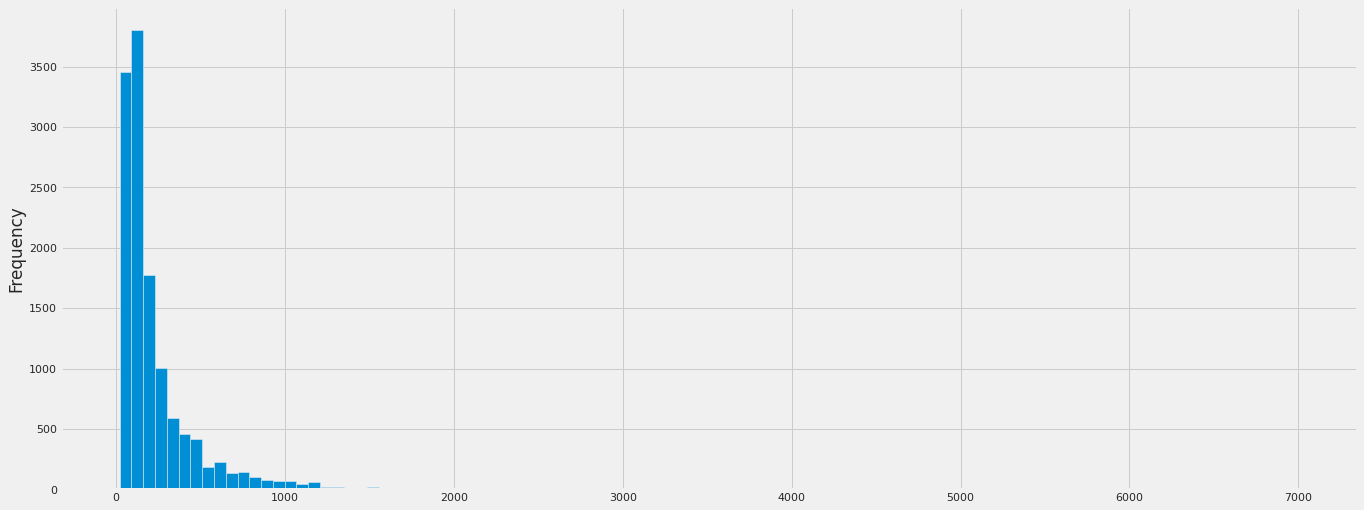

harga


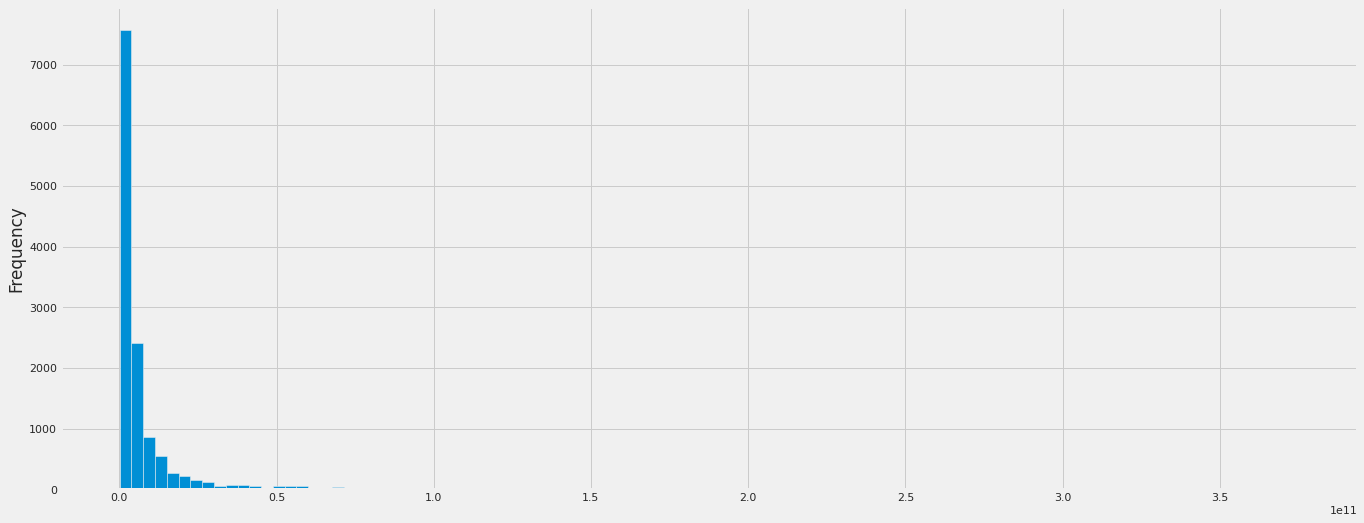

listrik


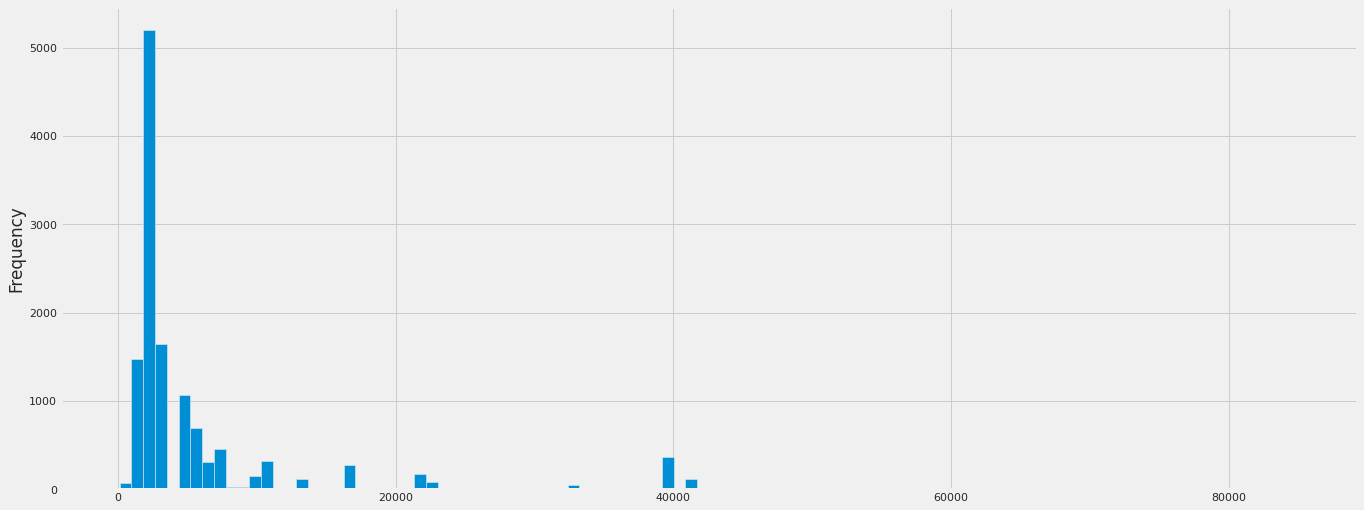

jumlah_lantai


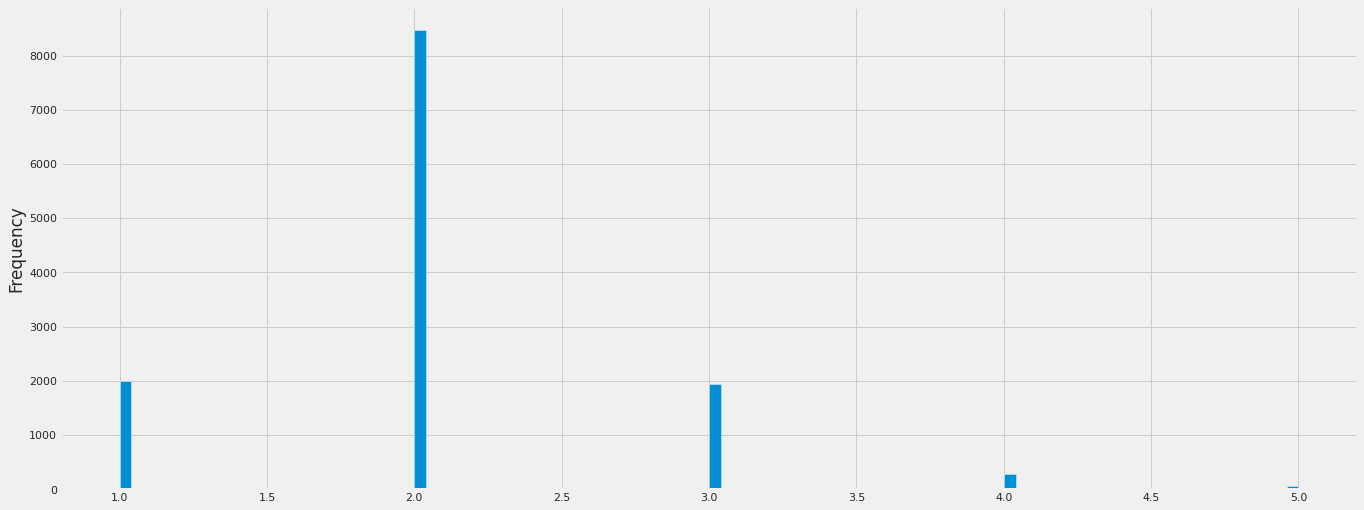

In [19]:
for i in num:
    print(i)
    df[i].plot.hist(bins = 100)
    plt.show()

kamar_mandi


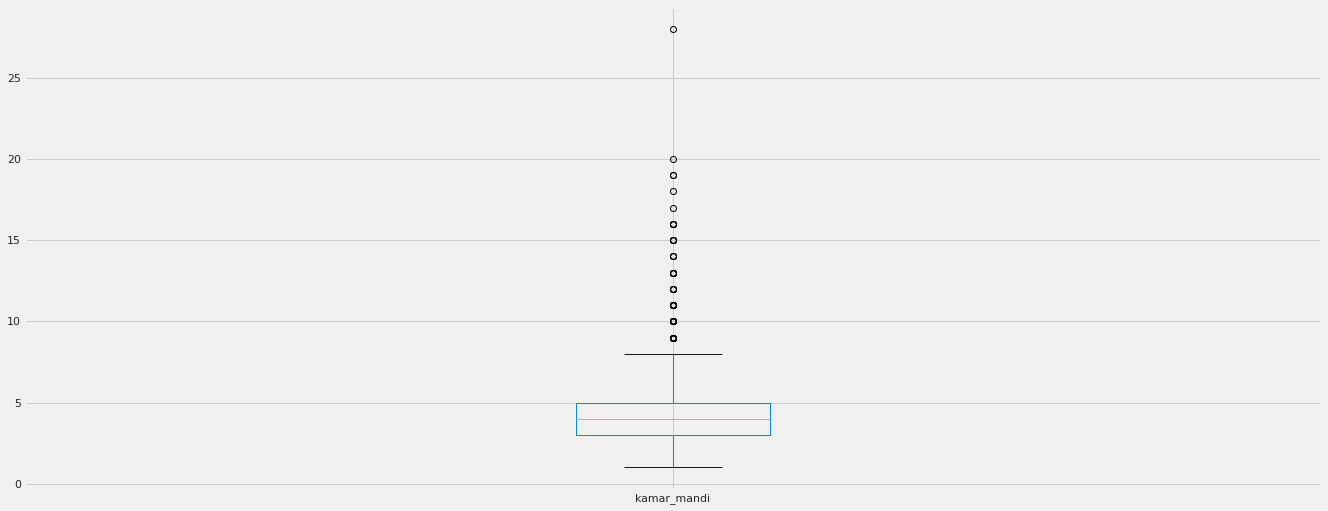

kamar_tidur


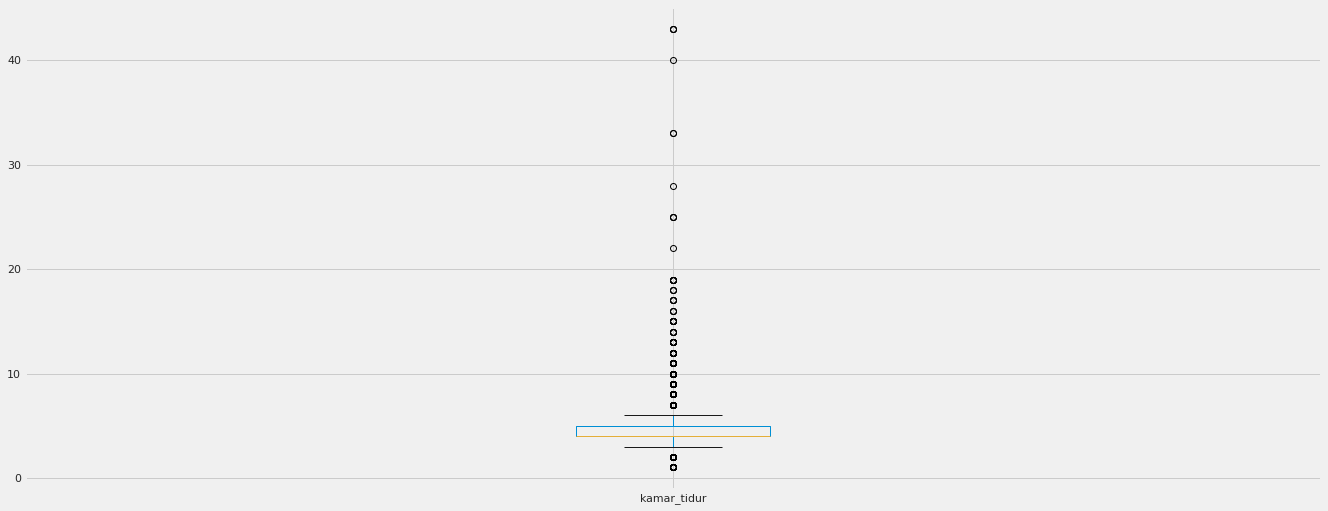

luas_bangunan


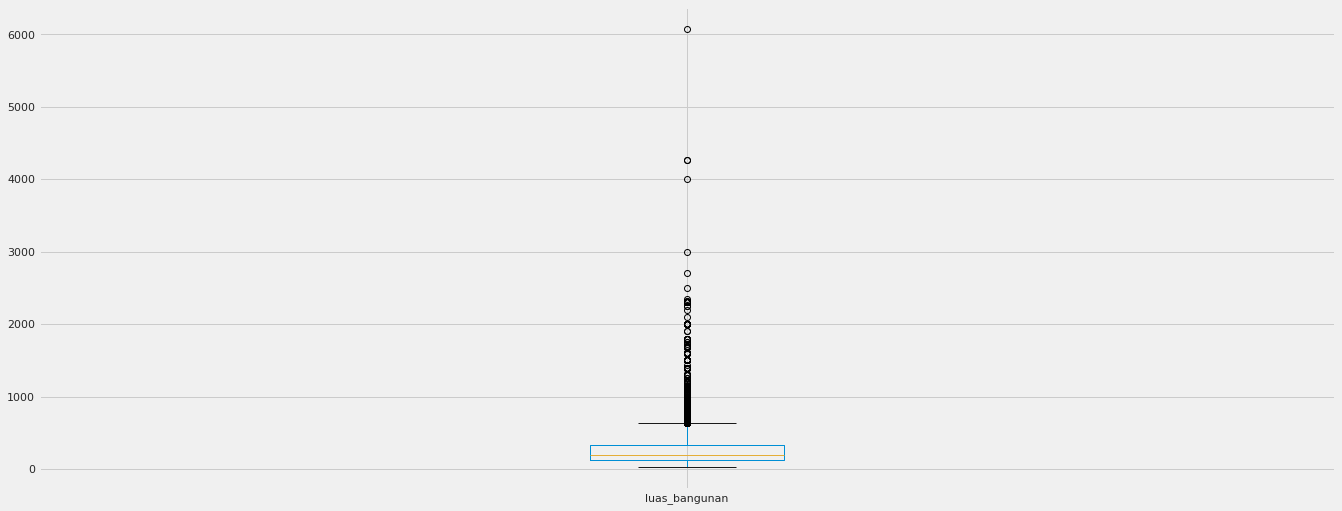

luas_tanah


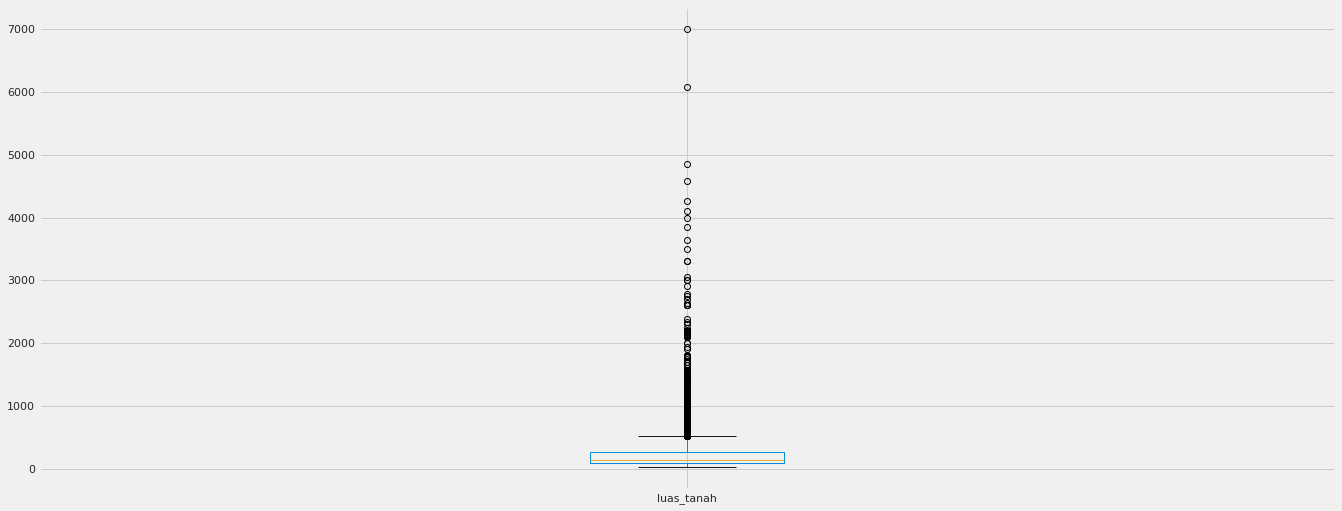

harga


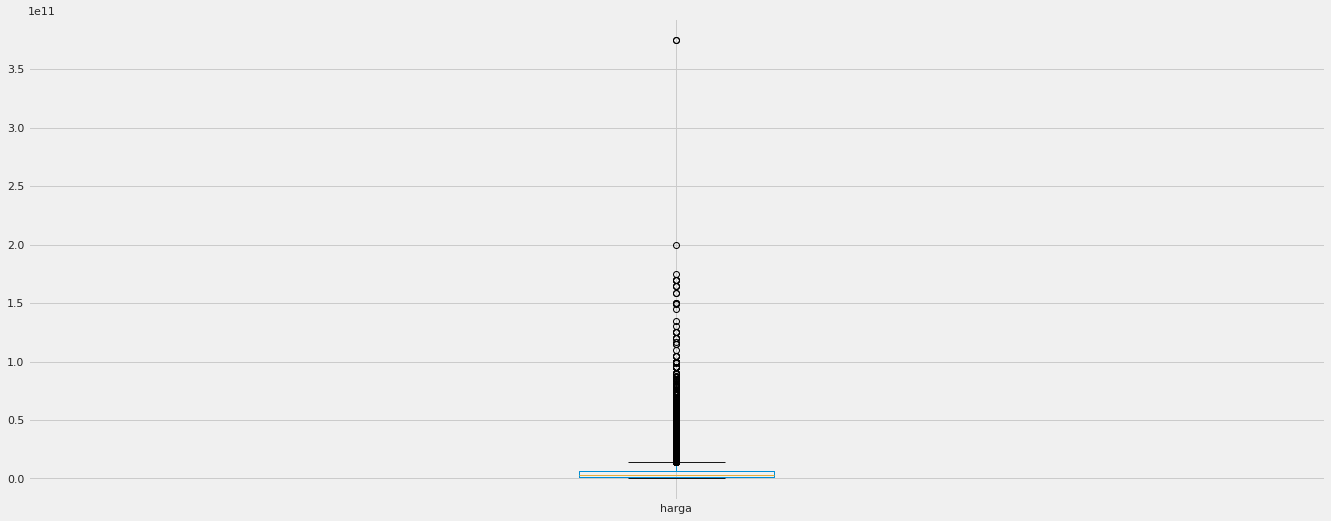

listrik


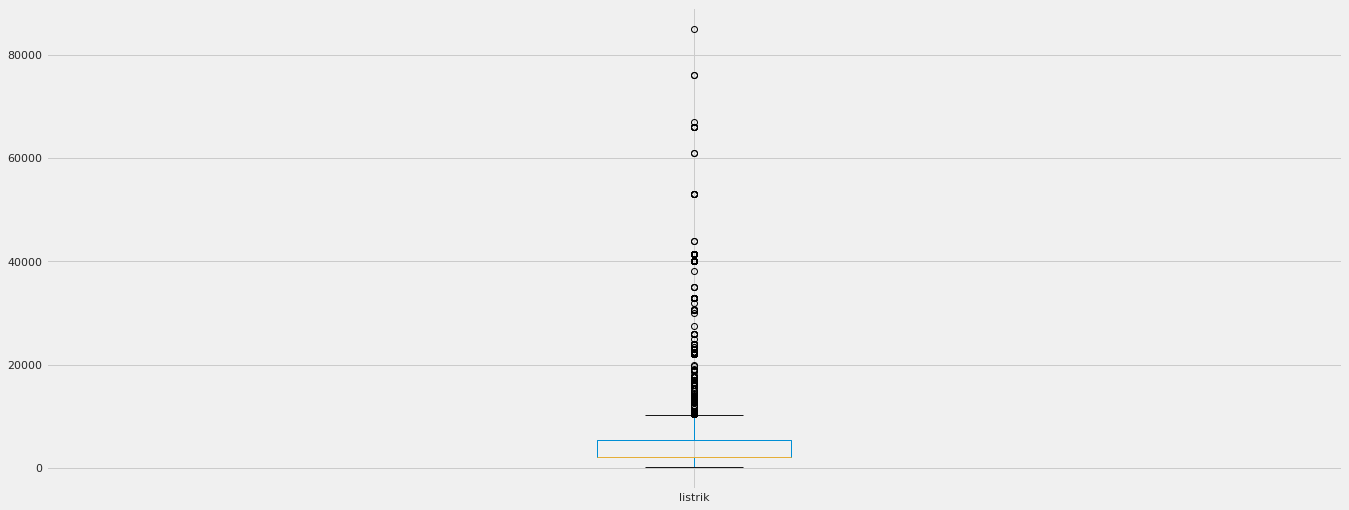

jumlah_lantai


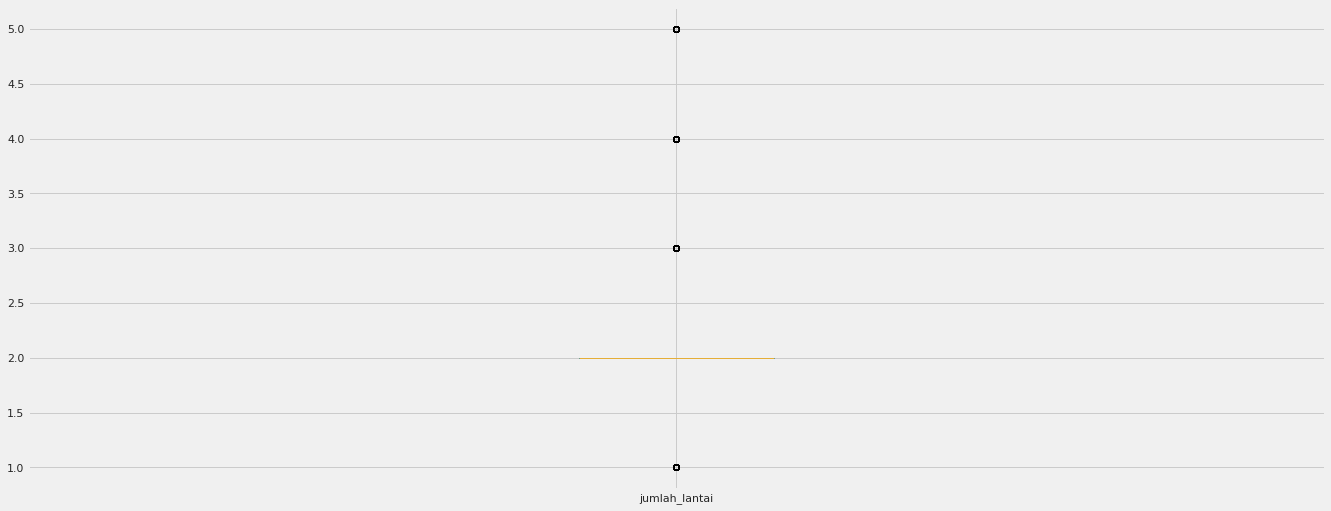

In [20]:
for i in num:
    print(i)
    df[i].plot.box()
    plt.show()

In [ ]:
for i in cat:
    print(i)
    df[i].value_counts().sort_values().plot.bar()
    plt.show()

deskripsi


Masukin target (harga)

In [ ]:
for i in num+cat:
    if i != 'harga':
        print(i)
        plt.scatter(df[i],df['harga'])
        plt.show()

In [ ]:
for i in cat:
    print(i)
    df.groupby(i)['harga'].mean().sort_values().plot.bar()
    plt.show()
    df.groupby(i)['harga'].median().sort_values().plot.bar()
    plt.show()

In [ ]:
sns.heatmap(initial_data.corr(method = 'spearman'),annot=True)
plt.show()

Trimming outliers and feature selection

In [ ]:
from feature_engine.outliers import OutlierTrimmer as OT

In [ ]:
df_copy = df.copy()
df_copy = df_copy.drop(['garasi','jumlah_lantai','gym','taman'], axis = 1)

In [ ]:
trimmer = OT(
    capping_method = 'iqr', 
    tail = 'right', 
    fold = 3, 
    variables = ['harga'])
df_copy = trimmer.fit_transform(df_copy)

In [ ]:
df_copy.info()

In [ ]:
N = 2659205 #population size
n = len(df_copy) #sample size
error = sqrt((N-n)/(N*n))
error*100

In [ ]:
oe_trim = OE(variables = [i for i in cat if i not in ['garasi','jumlah_lantai','gym','taman']])
oe_trim.fit(df_copy,df_copy['harga'])
x = oe_trim.transform(df_copy)

In [ ]:
x_scale = ss()
x_scale.fit(x.drop('harga',axis = 1))
y_scale = ss()
y_scale.fit(x[['harga']])

In [ ]:
x = x_scale.transform(x.drop(['harga'],axis = 1))
x = pd.DataFrame(x)
x.columns = df_copy.drop('harga', axis = 1).columns

y = y_scale.transform(df_copy[['harga']])
y = pd.DataFrame(y)
y.columns = ['harga']
initial_data = pd.concat([x,y],axis = 1)
x = sm.add_constant(x)

In [ ]:
model = sm.OLS(y, x).fit()
model.summary()

In [ ]:
pd.DataFrame(model.params).reset_index().sort_values(by = 0, ascending = False)

In [ ]:
y_pred = model.predict(x)
sqrt(mse(y_pred, y))

In [ ]:
for k in cat+num:
    try:
        if df_copy[k].nunique() <100:
            print("="*45,f' {k} ',"="*45)
            var = [i for i in df[k].unique()]
            pair = {}
            udah = []
            for i in var:
                for j in var:
                    if (j not in udah) & (i != j):
                        ttest = stats.ttest_ind(a = df[df[k] == i]['harga'],
                                                b = df[df[k] == j]['harga'])
                        p_value = ttest.pvalue
                        pair[f'{i} - {j}'] = p_value
                udah.append(i)
            count = 0
            for i,j in pair.items():
                if j >= 0.05:
                    print(i)
                    count += 1
            print(f'{k}: {count/len(pair)*100}')
            print("="*100,end = '\n')
    except:
        pass

In [ ]:
for i in num:
    try:
        print(i)
        df_copy[i].plot.hist(bins = 100)
        plt.show()
    except:
        pass

In [ ]:
for i in num:
    try:
        print(i)
        df_copy[i].plot.box()
        plt.show()
    except:
        pass

In [ ]:
for i in cat:
    try:
        print(i)
        df_copy[i].value_counts().sort_values().plot.bar()
        plt.show()
    except:
        print('udah di drop',end = '\n\n')

In [ ]:
for i in num+cat:
    try:
        if i != 'harga':
            print(i)
            plt.scatter(df_copy[i],df_copy['harga'])
            plt.show()
    except:
        print('udah di drop',end='\n\n')

In [ ]:
for i in cat:
    try:
        print(i)
        df_copy.groupby(i)['harga'].mean().sort_values().plot.bar()
        plt.show()
        df_copy.groupby(i)['harga'].median().sort_values().plot.bar()
        plt.show()
    except:
        print('udah di drop', end = '\n\n')

In [ ]:
sns.heatmap(pd.concat([x,y],axis = 1).drop('const', axis = 1).corr(method = 'spearman'),annot=True)
plt.show()

Lasso Regression

In [ ]:
df_experiment = df.copy()
df_experiment = df_experiment.drop(
    ['garasi','jumlah_lantai','gym','taman'],  axis = 1
)

In [ ]:
df_experiment.info()

In [ ]:
cat = [i for i in df_experiment.columns if df_experiment[i].dtypes =='O']

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
x_train, x_test, y_train, y_test = tts(
    df_experiment.drop('harga',axis = 1),
    df_experiment['harga'],
    test_size = 0.3,
    random_state = 0
)

In [ ]:
x_train = pd.DataFrame(x_train)
x_train.columns = df_experiment.drop('harga',axis = 1).columns
x_test = pd.DataFrame(x_test)
x_test.columns = x_train.columns

In [ ]:
oe = OE(variables = [i for i in cat])
oe.fit(x_train,y_train)

In [ ]:
x_train = oe.transform(x_train)
x_test = oe.transform(x_test)

In [ ]:
x_scale = ss()
x_scale.fit(x_train)

In [ ]:
x_train = x_scale.transform(x_train)
x_test = x_scale.transform(x_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_converter = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
x_train = poly_converter.fit_transform(x_train)
x_test = poly_converter.fit_transform(x_test)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
reg = Lasso(alpha=1000, tol = 1e-1).fit(x_train,y_train)

In [ ]:
train_predict = reg.predict(x_train)
test_predict = reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [ ]:
print('train mse: {}'.format(mean_squared_error(y_train, train_predict)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, train_predict))))
print('train r2: {}'.format(r2_score(y_train, train_predict)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, test_predict)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, test_predict))))
print('test r2: {}'.format(r2_score(y_test, test_predict)))

In [ ]:
x = np.concatenate((x_train,x_test))
y = np.concatenate((y_train,y_test))

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(reg, x, y, cv=5, scoring = 'r2')
scores.mean()

## Simpulan

- Data yang di peroleh tidak cukup bagus. hal tersebut dibuktikan dari nilai R2 dari regresi lienar menggunakan base model sebesar 0.565, yang artinya model tersebut tidak terlalu kuat(moderate:0.5-0.7) tetapi model tersebut masih dapat diterima (Falk and Miller (1992)). Terdapat kenaikan nilai r2 sebesar 0.1 jika dataset tersebut di trimming dan dilakukan feature selection. Pemilihan feature tersebut berdasarkan hasil dari summary statsmodels, yang mana feature yang dipilih adalah feature yang memiliki p-val < 0.05.  

- Median dan mean harga rumah tertinggi berdasarkan kecamatan adalah daerah Menteng. Dalam dataset tesebut, sebanyak 300 rumah di Menteng merupakan outliers(> 3 x iqr) sehingga ketika dataset tersebut di trimming, mean harga rumah tertinggi berdasarkan kecamatan bukan lagi menteng. 

- Berdasarkan a/b testing menggunakan independent t test, sebanyak +- 20% pasangan kecamatan tidak memiliki perbedaan harga. Terdapat perbedaan harga rumah yang cukup signifikan (p value t test < 0.5) pada rumah yang memiliki fasilitas seperti gym, kolam renang dan taman. Harga rumah yang memiliki fasilitas tersebut memiliki median dan mean yang lebih tinggi.

- semua feature yang digunakan dalam dataset ini memiliki korelasi positif terhadap harga. tetapi, dalam regresi linier menggunakan OLS terdapat koefisien negatif. hal tersebut terjadi karena pengaruh feature tersebut terhadap harga lebih kecil dibanding feature lain. Selain itu p-value dari feature tersebut lebih besar dari 0.05, yang artinya feature tersebut tidak terlalu penting dalam regresi.

- Jika model yang digunakan adalah model polynomial, terdapat kenaikan nilai r2 yang cukup signifikan terhadap dataset original, yaitu sebesar 0.2. Untuk menghindari terjadinya overfitting, maka digunakan lasso regression dengan nilai alpha yang cukup besar untuk menghilangkan feature-feature yang tidak terlalu berpengaruh. Regresi tersebut dapat dikatakan cukup bagus karena nilai r2 pada train set sebesar 0.74 dan nilai r2 pada test set sebesar 0.70. Perbedaan r2 tersebut tidak terlalu signifikan sehingga dapat dikatakan model tersebut tidak overfitting. Selain itu, karena nilai r2nya lebih dari 0.7, dapat dikatakan model tersebut memiliki strong effect.

- Dengan menggunakan slovin's formula, sample size = len df dan population size didapat dari situs bps, diperoleh margin of error sebesar +-0.9% (sebelum dan sesudah trimming)

- feature yang paling berpengaruh adalah ...

######  *nb:*  

*diperlukan studi lebih lanjut untuk menentukan nilai batas p-value dan feature apa saja yang boleh di buang*

*data yang digunakan terbatas pada tahun 2020-2021*